In [15]:
import mediapipe as mp
import cv2
import numpy as np

# Paths
MODEL_PATH = "face_landmarker.task"
front_image_path = "front.png"
left_image_path = "left.png"
right_image_path = "right.png"

# Setup MediaPipe
BaseOptions = mp.tasks.BaseOptions
FaceLandmarker = mp.tasks.vision.FaceLandmarker
FaceLandmarkerOptions = mp.tasks.vision.FaceLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = FaceLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=MODEL_PATH),
    running_mode=VisionRunningMode.IMAGE,
)


def extract_landmarks_full(image_path, landmarker):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=image_rgb)
    result = landmarker.detect(mp_image)

    if not result.face_landmarks:
        raise ValueError(f"No face detected in {image_path}")

    landmarks = result.face_landmarks[0]
    pts = [[lm.x, lm.y, lm.z, lm.visibility, lm.presence] for lm in landmarks]
    return pts


with FaceLandmarker.create_from_options(options) as landmarker:
    pts_front = extract_landmarks_full(front_image_path, landmarker)
    pts_left = extract_landmarks_full(left_image_path, landmarker)
    pts_right = extract_landmarks_full(right_image_path, landmarker)

# Optional: convert to NumPy arrays if needed
np_pts_front = np.array(pts_front)
np_pts_left = np.array(pts_left)
np_pts_right = np.array(pts_right)

# Check shapes
print("pts_front shape:", np_pts_front.shape)  # should be (478, 5)
print(np_pts_front[107])  # should be (478, 5)

pts_front shape: (478, 5)
[ 0.47390133  0.40552908 -0.00949934  0.          0.        ]


I0000 00:00:1744222690.991962  204077 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1744222690.992314  204077 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1744222690.997912  282170 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744222691.009949  282174 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [3]:
import mediapipe as mp
import cv2

# Paths
MODEL_PATH = "face_landmarker.task"
front_image_path = "front.png"
left_image_path = "left.png"
right_image_path = "right.png"

# Setup MediaPipe
BaseOptions = mp.tasks.BaseOptions
FaceLandmarker = mp.tasks.vision.FaceLandmarker
FaceLandmarkerOptions = mp.tasks.vision.FaceLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = FaceLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=MODEL_PATH),
    running_mode=VisionRunningMode.IMAGE,
)


def extract_landmarks(image_path, landmarker):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=image_rgb)
    result = landmarker.detect(mp_image)

    if not result.face_landmarks:
        raise ValueError(f"No face detected in {image_path}")

    landmarks = result.face_landmarks[0]
    print(landmarks[0])
    pts = [[lm.x * image.shape[1], lm.y * image.shape[0]] for lm in landmarks]
    return pts


with FaceLandmarker.create_from_options(options) as landmarker:
    pts_front = extract_landmarks(front_image_path, landmarker)
    pts_left = extract_landmarks(left_image_path, landmarker)
    pts_right = extract_landmarks(right_image_path, landmarker)

# Result is in list format
print(f"pts_front = {pts_front[:3]} ...")  # preview first 3 points
print(f"pts_left = {pts_left[:3]} ...")
print(f"pts_right = {pts_right[:3]} ...")

I0000 00:00:1744222245.368962  204077 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1744222245.369300  204077 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1744222245.375177  273201 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744222245.387815  273207 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


NormalizedLandmark(x=0.4971594214439392, y=0.6372610330581665, z=-0.03765115141868591, visibility=0.0, presence=0.0)
NormalizedLandmark(x=0.5079509615898132, y=0.6135005950927734, z=-0.03039335086941719, visibility=0.0, presence=0.0)
NormalizedLandmark(x=0.4909392297267914, y=0.6155112981796265, z=-0.024081628769636154, visibility=0.0, presence=0.0)
pts_front = [[954.5460891723633, 688.2419157028198], [956.4049530029297, 627.2376680374146], [956.4825439453125, 648.5859489440918]] ...
pts_left = [[975.2658462524414, 662.5806427001953], [988.582878112793, 611.9271898269653], [973.370361328125, 631.3708019256592]] ...
pts_right = [[942.6033210754395, 664.7522020339966], [932.1615600585938, 612.3779296875], [945.7697296142578, 630.7001638412476]] ...


I0000 00:00:1744936293.383678 1767677 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1744936293.387551 1767677 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1744936293.397549 1768658 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744936293.413477 1768658 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


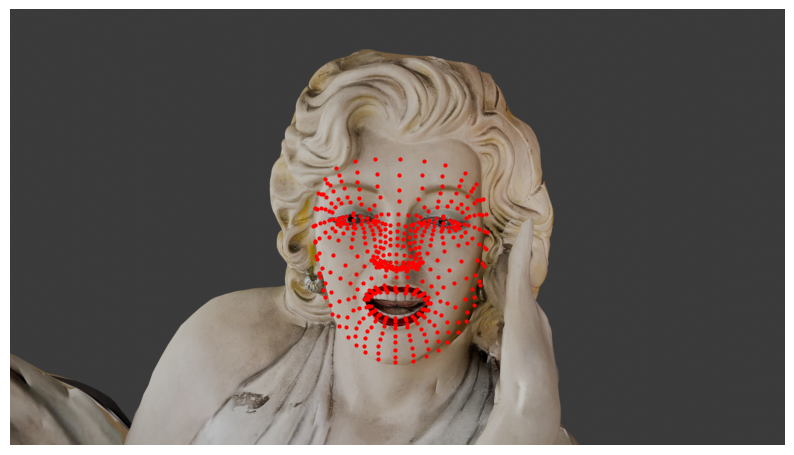

In [1]:
import mediapipe as mp
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paths
MODEL_PATH = "face_landmarker.task"
front_image_path = "front.png"
left_image_path = "left.png"
right_image_path = "right.png"

# Load image
image = cv2.imread(front_image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Set up FaceLandmarker
BaseOptions = mp.tasks.BaseOptions
FaceLandmarker = mp.tasks.vision.FaceLandmarker
FaceLandmarkerOptions = mp.tasks.vision.FaceLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = FaceLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=MODEL_PATH),
    running_mode=VisionRunningMode.IMAGE,
)

with FaceLandmarker.create_from_options(options) as landmarker:
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=image_rgb)
    result = landmarker.detect(mp_image)

# Plot results
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
for face_landmarks in result.face_landmarks:
    for landmark in face_landmarks:
        x = int(landmark.x * image.shape[1])
        y = int(landmark.y * image.shape[0])
        plt.plot(x, y, "ro", markersize=2)
plt.axis("off")
plt.show()

I0000 00:00:1744208813.939287   65167 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1744208813.939578   65167 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1744208813.942845  124228 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744208813.951363  124230 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


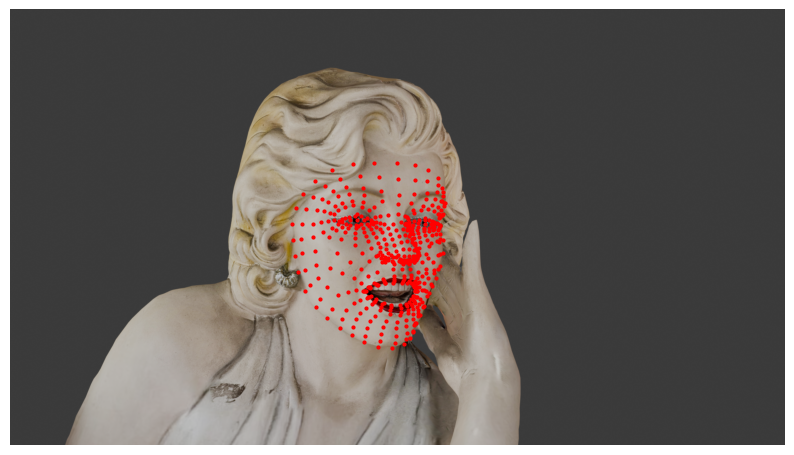

In [10]:
left_image_path = "left.png"

# Load image
image = cv2.imread(left_image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Set up FaceLandmarker
BaseOptions = mp.tasks.BaseOptions
FaceLandmarker = mp.tasks.vision.FaceLandmarker
FaceLandmarkerOptions = mp.tasks.vision.FaceLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = FaceLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=MODEL_PATH),
    running_mode=VisionRunningMode.IMAGE,
)

with FaceLandmarker.create_from_options(options) as landmarker:
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=image_rgb)
    result = landmarker.detect(mp_image)

# Plot results
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
for face_landmarks in result.face_landmarks:
    for landmark in face_landmarks:
        x = int(landmark.x * image.shape[1])
        y = int(landmark.y * image.shape[0])
        plt.plot(x, y, "ro", markersize=2)
plt.axis("off")
plt.show()

I0000 00:00:1744211040.983343   65167 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1744211040.983559   65167 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1744211040.987172  155650 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744211040.995051  155650 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


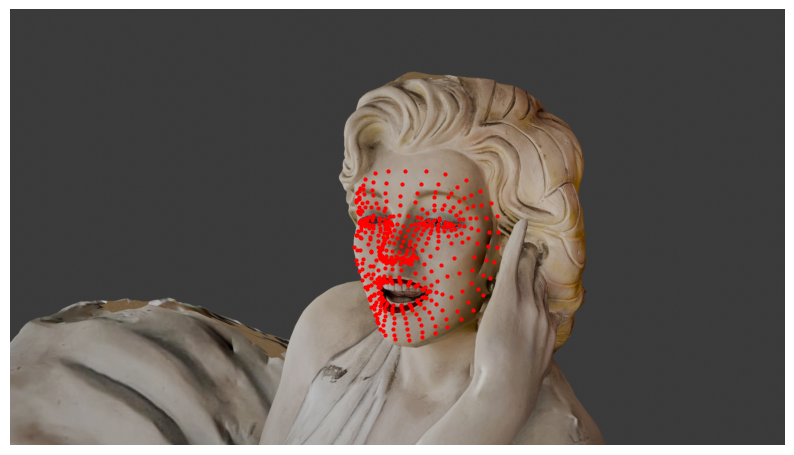

In [13]:
right_image_path = "right.png"

# Load image
image = cv2.imread(right_image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Set up FaceLandmarker
BaseOptions = mp.tasks.BaseOptions
FaceLandmarker = mp.tasks.vision.FaceLandmarker
FaceLandmarkerOptions = mp.tasks.vision.FaceLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = FaceLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=MODEL_PATH),
    running_mode=VisionRunningMode.IMAGE,
)

with FaceLandmarker.create_from_options(options) as landmarker:
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=image_rgb)
    result = landmarker.detect(mp_image)

# Plot results
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
for face_landmarks in result.face_landmarks:
    for landmark in face_landmarks:
        x = int(landmark.x * image.shape[1])
        y = int(landmark.y * image.shape[0])
        plt.plot(x, y, "ro", markersize=2)
plt.axis("off")
plt.show()

I0000 00:00:1744936444.280938 1767677 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1744936444.281232 1767677 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1744936444.286483 1774463 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744936444.298402 1774461 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


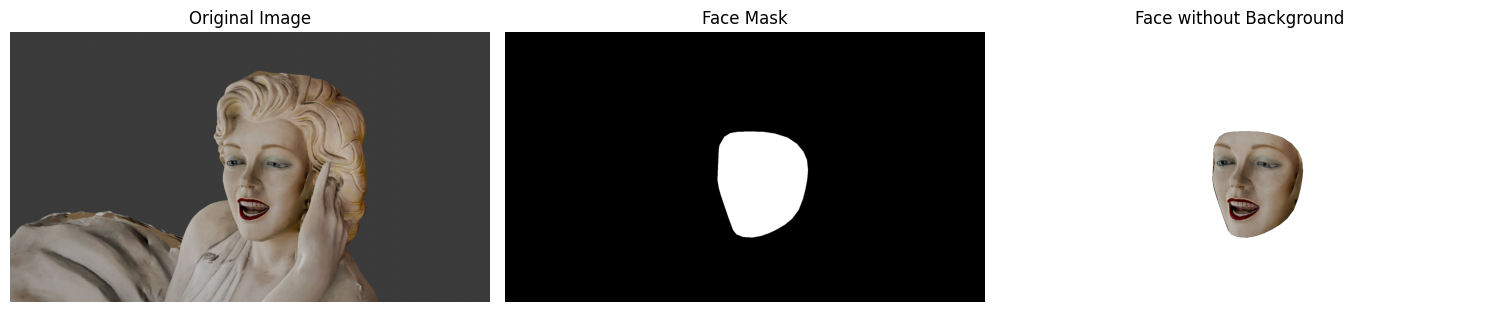

True

In [ ]:
import mediapipe as mp
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Paths
MODEL_PATH = "face_landmarker.task"
front_image_path = "front.png"
left_image_path = "left.png"
right_image_path = "right.png"

# Load image
image = cv2.imread(right_image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Set up FaceLandmarker
BaseOptions = mp.tasks.BaseOptions
FaceLandmarker = mp.tasks.vision.FaceLandmarker
FaceLandmarkerOptions = mp.tasks.vision.FaceLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = FaceLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=MODEL_PATH),
    running_mode=VisionRunningMode.IMAGE,
)

with FaceLandmarker.create_from_options(options) as landmarker:
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=image_rgb)
    result = landmarker.detect(mp_image)

# Create a mask for the face region
mask = np.zeros(image.shape[:2], dtype=np.uint8)

for face_landmarks in result.face_landmarks:
    # Get facial landmark coordinates
    points = []
    for landmark in face_landmarks:
        x = int(landmark.x * image.shape[1])
        y = int(landmark.y * image.shape[0])
        points.append([x, y])

    # Convert to numpy array
    points = np.array(points)

    # Create convex hull around face
    hull = ConvexHull(points)
    hull_points = points[hull.vertices]

    # Fill convex hull to create mask
    cv2.fillConvexPoly(mask, hull_points.astype(np.int32), 255)

    # Optional: Dilate the mask slightly to include a bit more of the face
    mask = cv2.dilate(mask, np.ones((5, 5), np.uint8), iterations=1)

# Apply mask to original image
masked_image = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# Create background removal result (transparent background)
# Create RGBA image (4 channels)
rgba_image = np.zeros((image.shape[0], image.shape[1], 4), dtype=np.uint8)
rgba_image[:, :, :3] = masked_image  # Copy RGB channels
rgba_image[:, :, 3] = mask  # Set alpha channel from mask

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title("Face Mask")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(rgba_image)
plt.title("Face without Background")
plt.axis("off")

plt.tight_layout()
plt.show()

# Save the result with transparent background
cv2.imwrite("right_image_path.png", cv2.cvtColor(rgba_image, cv2.COLOR_RGBA2BGRA))